# Characterization of Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Convolution

As shown in the previous Section, the convolution is an important operation in the theory of signals and systems. It also shows up in a wide range of other physical and mathematical problems. The [convolution operation](https://en.wikipedia.org/wiki/Convolution) is therefore of general interest and well known. The properties of the convolution are reviewed, followed by a widely used graphical interpretation of the operation.

The convolution of two signals $x(t)$ and $h(t)$ is defined as

\begin{equation}
(x * h)(t) = x(t) * h(t) = \int_{\tau = -\infty}^{\tau=\infty} x(\tau) \cdot h(t - \tau) \; d\tau = 
\int_{\tau=-\infty}^{\tau=\infty} x(t - \tau) \cdot h(\tau) \; d\tau
\end{equation}

where $*$ is a common short-hand notation of the convolution.

### Properties

For the signals $x(t)$, $h(t)$, $g(t) \in \mathbb{C}$ the convolution shows the following properties 

1. The Dirac impulse is the [identity element](https://en.wikipedia.org/wiki/Identity_element) of the convolution
    \begin{equation}
    x(t) * \delta(t) = x(t)
    \end{equation}

2. The convolution is [commutative](https://en.wikipedia.org/wiki/Commutative_property)
    \begin{equation}
    x(t) * h(t) = h(t) * x(t)
    \end{equation}

3. The convolution is [associative](https://en.wikipedia.org/wiki/Associative_property)
    \begin{equation}
    \left[ x(t) * h(t) \right] * g(t) = x(t) * \left[ h(t) * g(t) \right] 
    \end{equation}

5. The convolution is [distributive](https://en.wikipedia.org/wiki/Distributive_property)
    \begin{equation}
    x(t) * \left[ h(t) + g(t) \right] = x(t) * h(t) + x(t) * g(t)
    \end{equation}

5. Multiplication with a scalar $a \in \mathbb{C}$
    \begin{equation}
    a \cdot \left[ x(t) * h(t) \right] = \left[ a \cdot x(t) \right] * h(t) = x(t) * \left[ a \cdot h(t) \right]
    \end{equation}

6. Derivative of the convolution
    \begin{equation}
    \frac{d}{dt} \left[ x(t) * h(t) \right] =  \frac{d x(t)}{dt} * h(t) = x(t) * \frac{d h(t)}{dt}
    \end{equation}

The first property is a consequence of the sifting property of the Dirac pulse, the second to fifth property can be proven by considering the convolution integral and the sixth property follows from the properties of the derivative of the Dirac delta function.

### Graphical Interpretation

The convolution is commonly [interpreted in a graphical manner](https://en.wikipedia.org/wiki/Convolution#Visual_explanation). This interpretation provides valuable insights into its calculation and allows to derive a first estimate of the result. The calculation of the convolution integral

\begin{equation}
y(t) = \int_{\tau = -\infty}^{\tau = \infty} x(\tau) \cdot h(t-\tau) \; d\tau
\end{equation}


can be decomposed into four subsequent operations:

1. substitute $t$ by $\tau$ in both $x(t)$ and $h(t)$,

2. time-reverse $h(\tau)$ (mirroring at vertical axis),

3. shift $h(-\tau)$ by $t$ to yield $h(t - \tau)$, i.e. a shift to **right** for $t>0$ or a shift to **left** for $t<0$,

4. check for which $t = -\infty \dots \infty$ the mirrored & shifted $h(t - \tau)$ overlaps with $x(\tau)$, calculate the specific integral (i.e. the area of the overlap) for all these relevant $t$ to yield $y(t)$

The graphical interpretation of the convolution is illustrated by means of the following example.

**Example**

The convolution $y(t) = x(t) * h(t)$ is graphically illustrated using the particular signals

\begin{align}
h(t) &= e^{-t} \\
x(t) &= \frac{3}{4} \cdot \text{rect} \left(t - \frac{1}{2}\right)
\end{align}

Before proceeding, helper functions for the rectangular signal and plotting of the signals are defined

In [1]:
import sympy as sym
%matplotlib inline
sym.init_printing()

t, tau = sym.symbols('t tau', real=True)

In [2]:
class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

In [3]:
def plot_signals(x_axis, x, h, ylabel, xlabel):
    p1 = sym.plot(x, (x_axis, -5, 5), show=False,
                  line_color='C1', ylabel=ylabel, xlabel=xlabel)
    p2 = sym.plot(h, (x_axis, -5, 5), show=False, line_color='C0')
    p1.extend(p2)
    p1.show()

Now lets define and plot the signals. In the following, the impulse response $h(t)$ is illustrated by the blue graph and the input signal $x(t)$ by the orange graph.

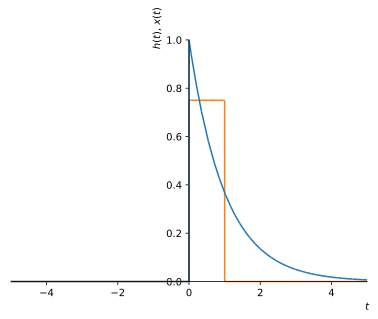

In [4]:
h = sym.exp(-t) * sym.Heaviside(t)
x = sym.Rational(3, 4) * rect(t - 1/2)

plot_signals(t, x, h, r'$h(t)$, $x(t)$', r'$t$')

The **first step** is to substitute $t$ by $\tau$ to yield $h(\tau)$ and $x(\tau)$. Note, the horizontal axis of the plot represents now $\tau$, which is our temporal helper variable for the integration

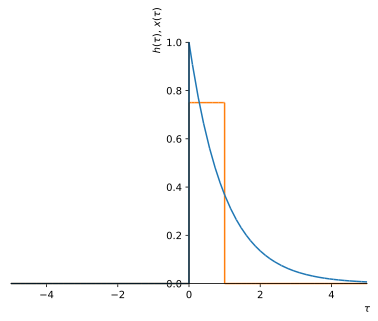

In [5]:
h1 = h.subs(t, tau)
x1 = x.subs(t, tau)

plot_signals(tau, x1, h1, r'$h(\tau)$, $x(\tau)$', r'$\tau$')

The **second step** is to time-reverse $h(\tau)$ to yield $h(-\tau)$

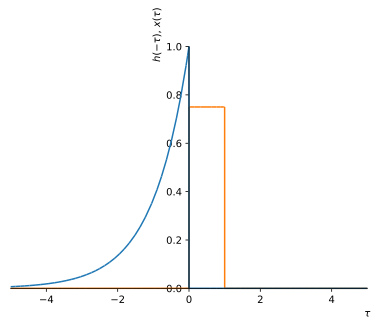

In [6]:
h2 = h.subs(t, -tau)

plot_signals(tau, x1, h2, r'$h(-\tau)$, $x(\tau)$', r'$\tau$')

In the **third step** the impulse response $h(-\tau)$ is shifted by $t$ to yield $h(t - \tau)$. The temporal shift is performed to the **right** for $t>0$ and to the **left** for $t<0$.

In [7]:
h3 = h.subs(t, t-tau)

For the **fourth step** it is often useful to split the calculation of the result according to the overlap between $h(t-\tau)$ and $x(\tau)$. For the given particular signals three different cases may be considered

1. no overlap for $t<0$,
2. partial overlap for $0 \leq t < 1$, and
3. full overlap for $t > 0$ (note that the chosen impulse response decays asymptotically).

The first case, no overlap, is illustrated for $t = -2$

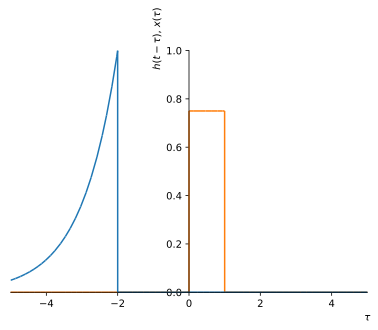

In [8]:
plot_signals(tau, x1, h3.subs(t, -2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

From this it becomes clear that the convolution result for the first case is given as

\begin{equation}
y(t) = 0 \qquad \text{for } t < 0
\end{equation}

The second case, partial overlap, is illustrated for $t = \frac{1}{2}$

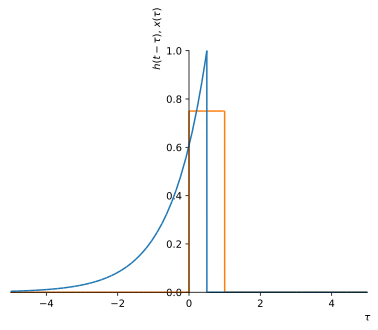

In [9]:
plot_signals(tau, x1, h3.subs(t, .5), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Hence, for the second case the convolution integral degenerates to

\begin{equation}
y(t) = \frac{3}{4}\int_{0}^{t} e^{-(t - \tau)} d\tau = \frac{3}{4} (1 - e^{-t}) \qquad \text{for } 0 \leq t < 1
\end{equation}

The third case, full overlap, is illustrated for $t = 3$

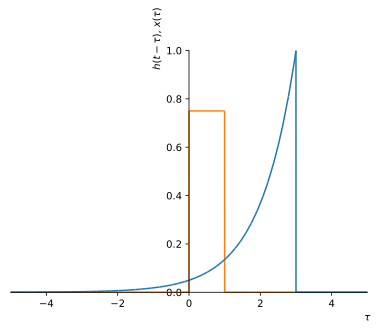

In [10]:
plot_signals(tau, x1, h3.subs(t, 3), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

For the third case the convolution integral degenerates to

\begin{equation}
y(t) = \frac{3}{4} \int_{0}^{1} e^{-(t - \tau)} d\tau = \frac{3}{4} (e - 1) e^{-t} \qquad \text{for } t \geq 1
\end{equation}

The overall result is composed from the three individual results. As alternative and in order to plot the result, the convolution integral is evaluated in `SymPy`

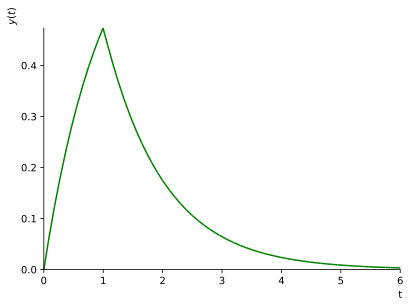

In [11]:
y = sym.integrate(h.subs(t,t-tau) * x.subs(t, tau), (tau, 0, t))
sym.plot(y, (t,0,6), ylabel=r'$y(t)$', line_color='g');

The entire process is illustrated in the following animation. The upper plot shows the integrands $h(t-\tau)$ and $x(\tau)$ of the convolution integral, the lower plot the result $y(t) = x(t) * h(t)$ of the convolution. The red dot in the lower plot indicates the particular time instant $t$ for which the result of the convolution is computed. The filled red area in the upper plot illustrates the area below $x(\tau) \cdot h(t-\tau)$ for the same time instant. The area constitutes the result of the convolution integral. The time $t$ is varied in the animation.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from animation import animate_convolution
plt.rcParams['animation.html'] = 'jshtml'

anim = animate_convolution(x, h, y, t, tau, np.arange(-2, 5, .1), np.arange(-5, 5, 0.02))
anim

/anaconda3/lib/python3.7/site-packages/sympy/plotting/experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


### Alternative Graphical Interpretation

The **sequence** of mirroring and time shifting of $h(\tau)$ can be **exchanged**. The procedure is then performed as follows:

1. Substitute $t$ by $\tau$ in both $x(t)$ and $h(t)$, yielding $x(\tau)$ and $h(\tau)$ over helper variable $\tau$ (don't confuse $\tau$ with a time constant, e.g. from a RC-circuit)

2. Shift $h(\tau)$ by $t$ to yield $h(\tau-t)$, **delayed** for $t>0$, **leading** for $t<0$

3. Create $h(-(\tau-t)) = h(t-\tau)$, mirroring the signal along vertical axis at the value $t$

4. Calculate the convolution integral for all overlapping regions of $x(\tau)$ and $h(t-\tau)$, yielding the convolution result for a specific $t$

Perform 1st to 4th step for all $t$ - at least for all $t$ where overlapping occurs in the 4th step - to obtain the result.

The graphical interpretation of these operations is illustrated by the same functions as above. The impulse response $h(t)$ is illustrated by the orange graph and the input signal $x(t)$ by the blue graph.

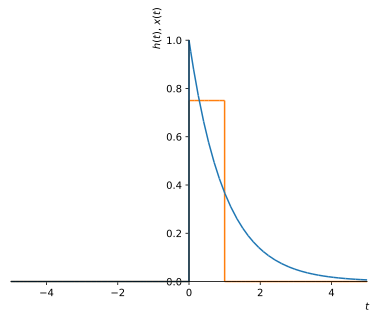

In [13]:
h = sym.exp(-t) * sym.Heaviside(t)
x = sym.Rational(3, 4) * rect(t - 1/2)

plot_signals(t, x, h, r'$h(t)$, $x(t)$', r'$t$')

The **first step** (identical to the approach above) is to substitute $t$ by $\tau$ to yield $h(\tau)$ and $x(\tau)$. Note, the horizontal axis of the plot represents now $\tau$.

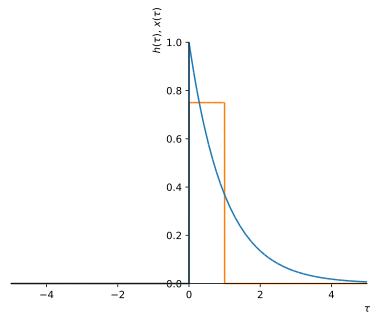

In [14]:
h1 = h.subs(t, tau)
x1 = x.subs(t, tau)

plot_signals(tau, x1, h1, r'$h(\tau)$, $x(\tau)$', r'$\tau$')

The **second step** is to shift $h(\tau)$ to yield $h(\tau-t)$. In the example $t=-2$ is chosen, thus $h(\tau-t)$ is now **leading** compared to $h(\tau)$.

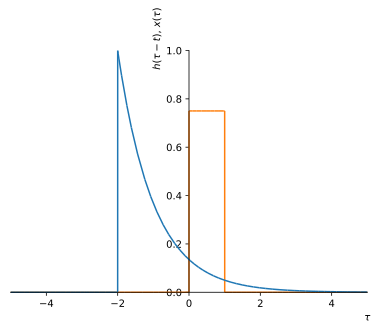

In [15]:
h2 = h.subs(t, tau-t)

plot_signals(tau, x1, h2.subs(t,-2), r'$h(\tau-t)$, $x(\tau)$', r'$\tau$')

In the **third** step we create $h(-(\tau-t)) = h(t-\tau)$, which is mirroring the signal $h(\tau-t)$ along vertical axis at the value $t$.

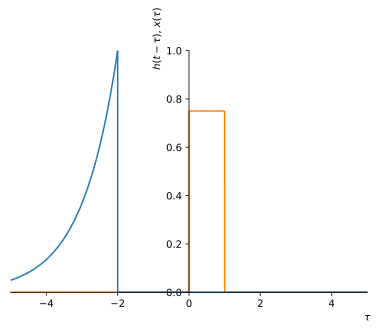

In [16]:
h3 = h.subs(t, -(tau-t))

plot_signals(tau, x1, h3.subs(t,-2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

In the **fourth step** the convolution integral is evaluated. In the example for $t=1$ the largest overlap area yields the convolution result $y(t=1) = \frac{3}{4}(1-\mathrm{e}^{-1}) \approx \frac{3}{4} \cdot 0.63 \approx 0.47$ , which is the maximum of $y(t)$.

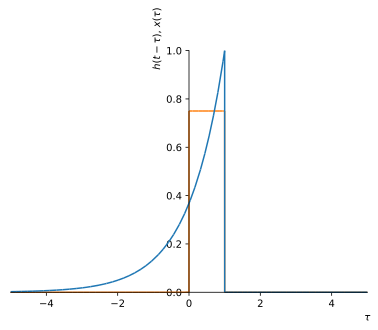

In [17]:
plot_signals(tau, x1, h3.subs(t,1), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Repeat steps one to four for all $t$ to obtain $y(t)$. Note that $y(t)$ is zero for all $t$ where no overlap of $x(\tau)$ and $h(t-\tau)$ occurs (integral = area is zero).

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.